# Final Project Template
## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:
Your data must be publically available for free.
Your data should be interesting to you. You want your final project to be something you're proud of.
* Your data should be "big enough":
* It should have at least 1,000 rows.
* It should have enough of columns to be interesting.
* If you have questions, contact a member of the instructional team.


## 2) Provide a link to your data
Your data is required to be free and open to anyone. As such, you should have a URL which anyone can use to download your data:

* Data that I use in this notebook

https://archive.ics.uci.edu/ml/datasets/Adult


### FROM UCI Dataset details

Donor: 

Ronny Kohavi and Barry Becker 
Data Mining and Visualization 
Silicon Graphics. 
e-mail: ronnyk '@' live.com for questions. 


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 


Attribute Information:

### Listing of attributes: 

 

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
*  fnlwgt: continuous. 
*  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
*  education-num: continuous. 
*  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
*  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
*  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
*  sex: Female, Male. 
*  capital-gain: continuous. 
*  capital-loss: continuous. 
*  hours-per-week: continuous. 
*  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*  income: >50K, <=50K.


Relevant Papers:

Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996 
[Web Link]


Date and Time this was run:

In [1]:
import datetime
datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")

'Wed, 27 November 2019 20:23:38'

In [2]:
#Imports as needed
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [3]:
print("Imports:")
print("NumPy: ",np.__version__)
print("Pandas: ",pd.__version__)

Imports:
NumPy:  1.17.3
Pandas:  0.25.3


In [4]:
# List files available
print(os.listdir("."))

['.DS_Store', '.git', '.ipynb_checkpoints', '1', 'adult.data', 'adult.data.csv', 'adult.names', 'adult.test', 'BIOF_003.ipynb', 'bkup_MR_RD_BIOF509_Final_Project.ipynb', 'Intro_to_ML.ipynb', 'Intro_to_ML_Chp2.ipynb', 'MR_RD_BIOF509_Final_Project.ipynb', 'myheadings', 'Old_final-project.ipynb', 'postBuild', 'README.md', 'requirements.txt', 'Scikit_Learn_Cheat_Sheet_Python.pdf', 'Skeleton_Version.ipynb', 'test.csv', 'train.csv', 'UCI Machine Learning Repository: Adult Data Set.webarchive', 'UCI_DataSet_Snapshot.jpg', 'UCI_DataSet_Snapshot.png', 'Untitled.ipynb']



## 3) Import your data

In the space below, import your data. If your data span multiple files, read them all in. 
If applicable, merge or append them as needed.

In [5]:
# Let us setup columns
h =['age', # continuous.
'workclass',# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
'fnlwgt', # continuous.
'education', # Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
'education-num', # continuous.
'marital-status', # Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
'occupation', # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
'relationship', # Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
'race', # White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
'sex', # Female, Male.
'capital-gain', # continuous.
'capital-loss', # continuous.
'hours-per-week', # continuous.
'native-country', # United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'income' # Over or under 50K    
   ]
# Use index_col to stop age(first column) being used as index column
medData = pd.read_csv('adult.data', names=h, index_col=False) 

## 3.1 Display a correlation matrix

<Figure size 720000x648000 with 0 Axes>

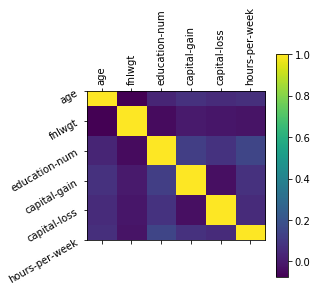

In [6]:
# From: https://github.com/practicalAI/practicalAI/blob/master/notebooks/03_Pandas.ipynb
# Correlation matrix
plt.figure(figsize=(10000,9000))
plt.matshow(medData.corr())
continuous_features = medData.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='90')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='30')
plt.colorbar()
plt.show()

# 4) Show me the head of your data.

## 4.1 Describe Data

In [7]:
medData.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
medData.index

RangeIndex(start=0, stop=32561, step=1)

In [9]:
medData.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [10]:
medData.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
medData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Sample for filtering medData[medData.age > 75]

income
 <=50K    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
 >50K     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

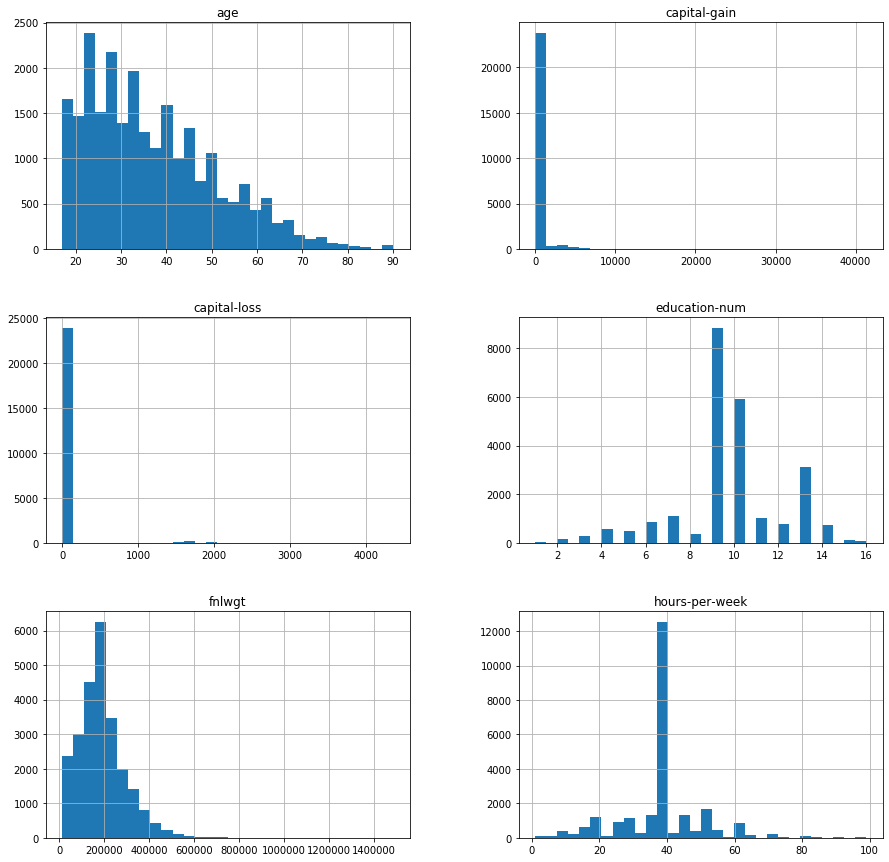

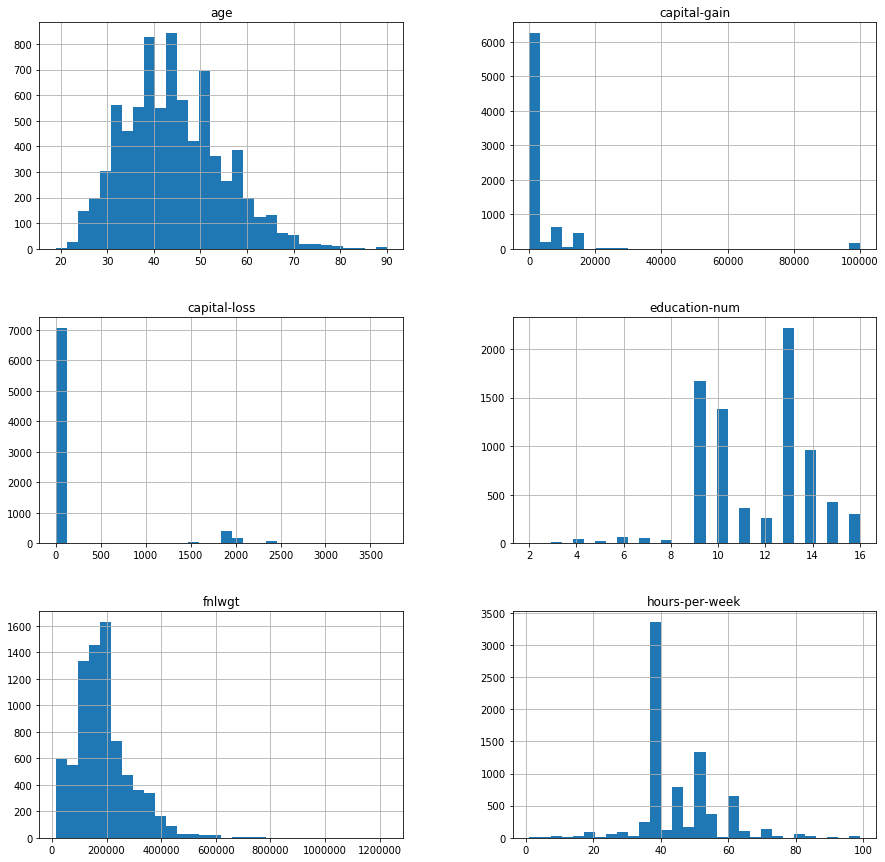

In [13]:
medData.groupby('income').hist(bins=30, figsize=(15, 15))

# 5) Show me the shape of your data.

In [14]:
medData.shape

(32561, 15)

## 5.1) Unique Values by Column

In [15]:
medData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

# 6) Show me the proportion of missing observations for each column of your data

##    6.1) Show me the proportion of missing observations for each column of your data

* All of the MISSING data is coded as " ?" in the data set


In [16]:
#medData.isin(['?'])[15] # https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe
#medData = medData.replace(" ?", np.NaN)
medData = medData.replace(" ?", np.NaN)

* Replaced " ?" in the data set with np.NaN; count NA values

In [17]:
medData.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [18]:
#df = medData.select_dtypes(include=np.number)

In [19]:
#dir(df)
#df.head()

In [20]:
#sns.heatmap(df.groupby('education-num').mean())

In [21]:
medData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



# 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.



## 7.1) Let us classify Affluent as income over 50K

In [22]:
X = medData.iloc[:,0:14]
y = medData.iloc[:,14:].replace(" >50K", "Affluent").replace(" <=50K", "Not Affluent")
X.head(), y.head()

(   age          workclass  fnlwgt   education  education-num  \
 0   39          State-gov   77516   Bachelors             13   
 1   50   Self-emp-not-inc   83311   Bachelors             13   
 2   38            Private  215646     HS-grad              9   
 3   53            Private  234721        11th              7   
 4   28            Private  338409   Bachelors             13   
 
         marital-status          occupation    relationship    race      sex  \
 0        Never-married        Adm-clerical   Not-in-family   White     Male   
 1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
 2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
 3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
 4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
 
    capital-gain  capital-loss  hours-per-week  native-country  
 0          2174             0              40   United-State

# Question: 
For this 
## * Predict if a person makes over 50K?

In [23]:
df = pd.get_dummies(medData)
df = df.drop('income_ <=50K', axis=1)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 32561, dtype: uint8

In [25]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [26]:
#list(df)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7989949748743719

In [28]:
medData.iloc[:,:-1]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7989949748743719

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
#from sklearn.svm import LinearSVC
neighCV = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(neighCV, X, y, cv=6)
cv_results['test_score']

array([0.79546711, 0.79988944, 0.793993  , 0.79473005, 0.79546711,
       0.79561371])

In [31]:
#from sklearn.svm import LinearSVC
neighCV = KNeighborsClassifier(n_neighbors=20)
cv_results = cross_validate(neighCV, X, y, cv=12)
cv_results['test_score']

array([0.79439941, 0.79845247, 0.79734709, 0.79955785, 0.79918939,
       0.7965352 , 0.80206414, 0.79395503, 0.80206414, 0.80058975,
       0.80427571, 0.79727239])

# 8) What is your y-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

## [8.1] Trying K-Nearest Neighbor 

## The y-variable that we predict is Income above 50K

In [32]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [33]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 32561, dtype: uint8

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
knn_accuracy = []
for i in range(1,10,3):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    a = accuracy_score(y_test, y_pred)
    print("Neighbors i:", i, "accuracy:", a)
    knn_accuracy.append([i,a])

Neighbors i: 1 accuracy: 0.7339167818209734
Neighbors i: 4 accuracy: 0.793489943190542
Neighbors i: 7 accuracy: 0.7865806847842776


In [35]:
# creating odd list of K for KNN
neighbors = list(range(1, 31, 5))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores = cross_validate(knn, X_train, y_train, cv=5)
    cv_scores.append(scores['test_score'])
    
print(cv_scores)

[array([0.73320537, 0.72571977, 0.72955854, 0.72643502, 0.72470724]), array([0.78771593, 0.79520154, 0.78944338, 0.79170666, 0.78498752]), array([0.78714012, 0.79481766, 0.7940499 , 0.79017086, 0.78940296]), array([0.79539347, 0.79980806, 0.79635317, 0.79535419, 0.79573815]), array([0.79481766, 0.79904031, 0.79942418, 0.79804185, 0.79746592]), array([0.79443378, 0.79846449, 0.79808061, 0.79631407, 0.79708197])]


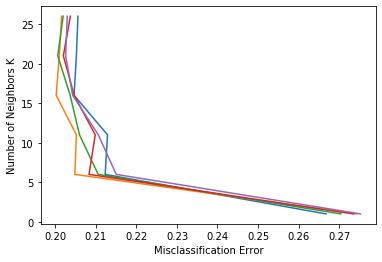

In [36]:
# https://www.ritchieng.com/machine-learning-cross-validation/    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
#optimal_k = neighbors[mse.index(min(mse))]
#print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(mse, neighbors)
plt.ylabel("Number of Neighbors K")
plt.xlabel("Misclassification Error")
plt.show()

## [8.2] Linear Regression

In [37]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.50686189e-03  6.23969842e-08  2.79065969e-02  7.88571258e-06
  8.92517306e-05  2.96513384e-03  1.04371816e-01  8.02224322e-03
 -2.98821429e-02  3.34820544e-02  9.14131309e-02 -3.85635185e-02
 -1.40382392e-02 -1.02110785e-01 -1.89396268e-02 -1.94585251e-02
 -2.57598981e-02  4.80111011e-02  4.10944111e-02 -2.55515048e-02
 -2.42515480e-02 -8.50365982e-02 -5.68281508e-02 -2.39680024e-02
  1.03265270e-01 -6.70946988e-02  4.15878644e-02  8.11917961e-02
  8.31858755e-02 -5.14477653e-02 -3.81064376e-02  7.41650090e-02
  7.21130911e-02 -1.79828934e-02 -4.89775462e-02 -2.81841659e-02
 -1.30270570e-02  1.02329210e-02 -1.40785105e-01 -7.00576207e-03
  1.39446967e-01 -9.61429518e-02 -4.86606375e-02 -4.20577421e-02
 -1.81440282e-02  1.65102744e-02  8.06240237e-02  8.79058295e-02
  5.42069897e-02  8.58335111e-02 -3.93875878e-02  7.48054160e-02
 -8.19885200e-02 -5.60127837e-02 -5.52381839e-02 -7.11935894e-02
  1.89627661e-01 -2.79462339e-02  1.55969076e-02  7.79822161e-03
 -1.69822

In [39]:
# Plot outputs
resid = np.abs(y_pred-y_test)

(array([2187., 1027.,  980.,  810.,  590.,  404.,  345.,  118.,   42.,
          10.]),
 array([1.22541700e-05, 1.04241434e-01, 2.08470613e-01, 3.12699793e-01,
        4.16928973e-01, 5.21158152e-01, 6.25387332e-01, 7.29616512e-01,
        8.33845691e-01, 9.38074871e-01, 1.04230405e+00]),
 <a list of 10 Patch objects>)

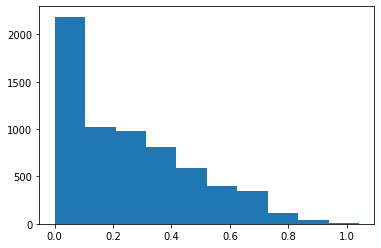

In [40]:
plt.hist(resid)

In [41]:
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_test.shape:  (6513, 105)
y_test.shape:  (6513,)


In [42]:
X_test.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=105)

In [43]:
y_pred.mean()

0.23337456626791425

In [44]:
y_test[0:100]

32129    1
7202     1
4900     1
7753     0
1208     0
        ..
87       0
12579    0
31991    0
7607     0
12285    0
Name: income_ >50K, Length: 100, dtype: uint8

In [45]:
y_pred[0:100]

array([ 3.08795187e-01,  5.43087546e-01,  2.84336758e-01, -8.84398071e-02,
       -1.65725443e-02,  4.87144464e-01,  4.35605817e-01,  2.71594938e-01,
       -1.05888410e-01,  1.68405437e-01,  6.00085383e-01,  6.56920536e-05,
        2.15405761e-01, -7.08967518e-03, -1.29438500e-01,  1.95494556e-01,
        3.80233373e-02,  2.27876818e-02,  3.64376302e-02,  6.45536767e-01,
        6.21735032e-01,  3.11943260e-02,  4.53061441e-01,  1.65593333e-01,
        2.65113546e-01,  2.70532332e-01,  3.80903625e-01,  6.99241289e-01,
        2.68427597e-03,  4.71524027e-01,  4.38591631e-02,  4.59074169e-01,
        5.18768470e-01,  3.49752978e-01,  7.18680005e-01,  3.12959964e-01,
       -2.43413350e-02,  6.90526941e-03,  8.65110846e-03,  8.84137093e-02,
        4.52403782e-01,  3.09605399e-01,  2.82149335e-01,  1.68140634e-01,
        7.67876303e-01,  1.87912735e-01,  3.13726145e-02,  1.87915052e-02,
        6.84794204e-02,  3.81927136e-03,  6.03872129e-01,  6.21948511e-01,
        3.30690854e-01,  

## [8.3] Logistic Regression

In [46]:
# import model
from sklearn.linear_model import LogisticRegression
# instantiate
logreg = LogisticRegression()

#Get Scores
scores_cv_trn = cross_validate(logreg, X_train, y_train, cv=10)
print("Training - Logistic Reg CV Sores: {}\n".format(scores_cv_trn));
print("************************************************************************\n")

#Get Scores
scores_cv_tst = cross_validate(logreg, X_test, y_test, cv=10)
print("Testing - Logistic Reg CV Sores: {}\n".format(scores_cv_tst));

Training - Logistic Reg CV Sores: {'fit_time': array([0.18095064, 0.1635108 , 0.17704821, 0.14879012, 0.165833  ,
       0.32533622, 0.26355982, 0.1582799 , 0.16036892, 0.16994214]), 'score_time': array([0.00377917, 0.00270915, 0.0025239 , 0.00256109, 0.00354409,
       0.0027318 , 0.00281906, 0.00242424, 0.0024209 , 0.00275683]), 'test_score': array([0.79193858, 0.80307102, 0.80230326, 0.79347409, 0.79577735,
       0.79769674, 0.79270633, 0.79424184, 0.78763441, 0.80107527])}

************************************************************************

Testing - Logistic Reg CV Sores: {'fit_time': array([0.049793  , 0.04326892, 0.03872395, 0.04552698, 0.0393641 ,
       0.03481603, 0.0361762 , 0.03524399, 0.03549123, 0.03734303]), 'score_time': array([0.00256324, 0.00220799, 0.00190306, 0.00183725, 0.0026691 ,
       0.00181985, 0.00184608, 0.00181508, 0.00179887, 0.00184584]), 'test_score': array([0.82208589, 0.80674847, 0.80521472, 0.80337942, 0.78801843,
       0.78955453, 0.78801843

## The mean CV scores:

In [47]:
print("\nTesting - Logistic Reg CV Sores: {}\n".format(scores_cv_tst['test_score'].mean()));
print("\nTraining - Logistic Reg CV Sores: {}\n".format(scores_cv_trn['test_score'].mean()));


Testing - Logistic Reg CV Sores: 0.8037735715699302


Training - Logistic Reg CV Sores: 0.7959918890471178



In [48]:
cv_new = []

for i in list(range(5,100,5)):
    #Get Scores
    scores_cv_tst = cross_validate(logreg, X_test, y_test, cv=i)
    #print("Testing - Logistic Reg CV Sores: {}\n".format(scores_cv_tst));
    cv_new.append((i, scores_cv_tst['test_score'].mean()))

print("\n Mean Scores (CV, Mean) {}".format(cv_new))


 Mean Scores (CV, Mean) [(5, 0.8037780001956965), (10, 0.8037735715699302), (15, 0.8039289790934291), (20, 0.803922557377333), (25, 0.8033405250646629), (30, 0.8039298515104965), (35, 0.8036200990660194), (40, 0.8042284828097088), (45, 0.8035952343462971), (50, 0.8040852212465918), (55, 0.8045187813183826), (60, 0.8047690914499054), (65, 0.804101748636402), (70, 0.8037814164787398), (75, 0.8045309956015649), (80, 0.8042085233436002), (85, 0.8037415628746897), (90, 0.8038838496030277), (95, 0.8046514624156301)]


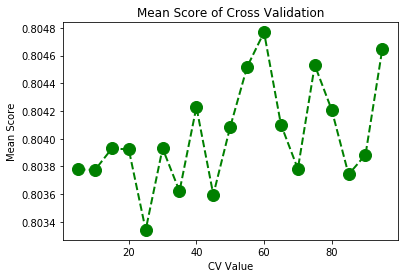

<Figure size 7200x7200 with 0 Axes>

In [49]:
plt.title('Mean Score of Cross Validation')
plt.xlabel('CV Value')
plt.ylabel('Mean Score')
plt.plot (*zip(*cv_new),color='green', marker='o', linestyle='dashed',
            linewidth=2, markersize=12, animated=True)
plt.figure(figsize=(100,100))
plt.show()

## K Means Estimates for 3K rows

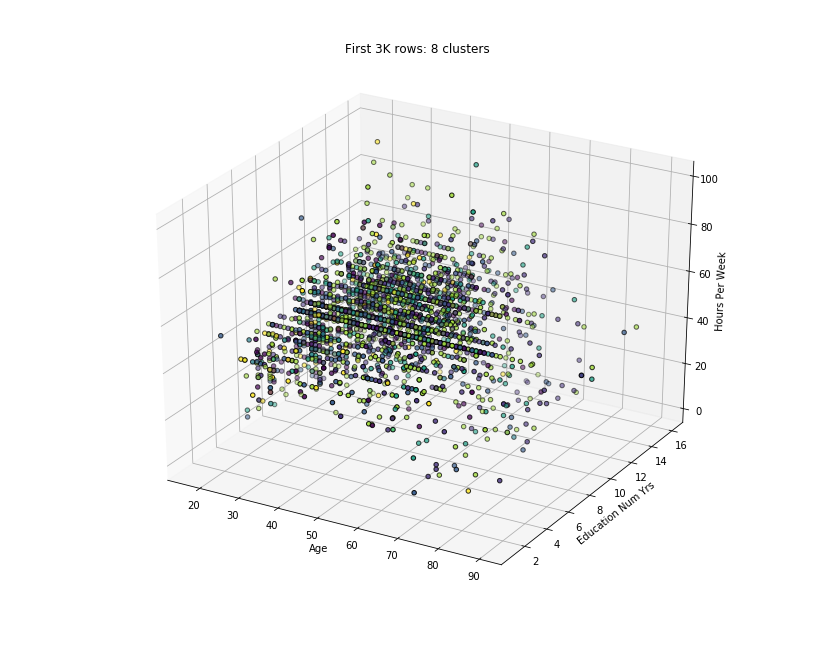

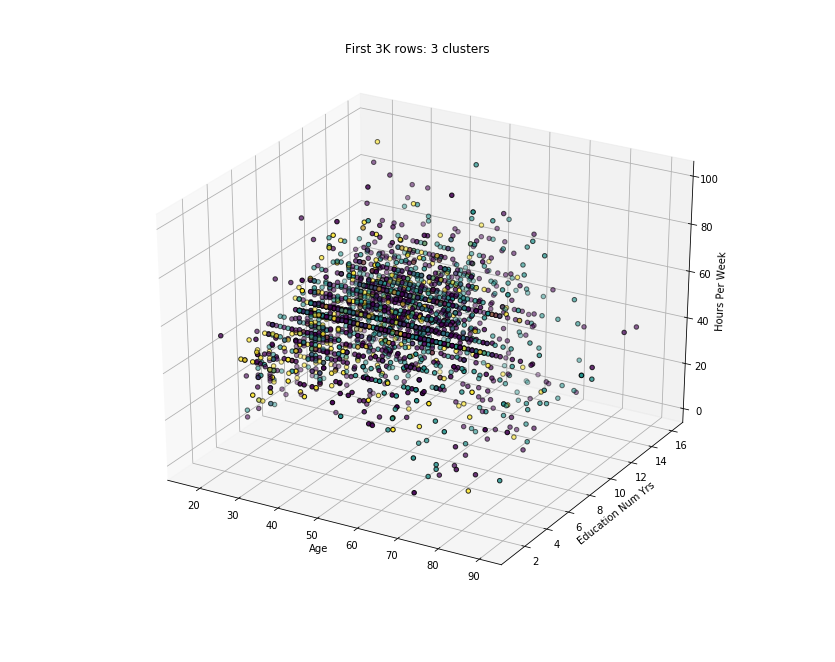

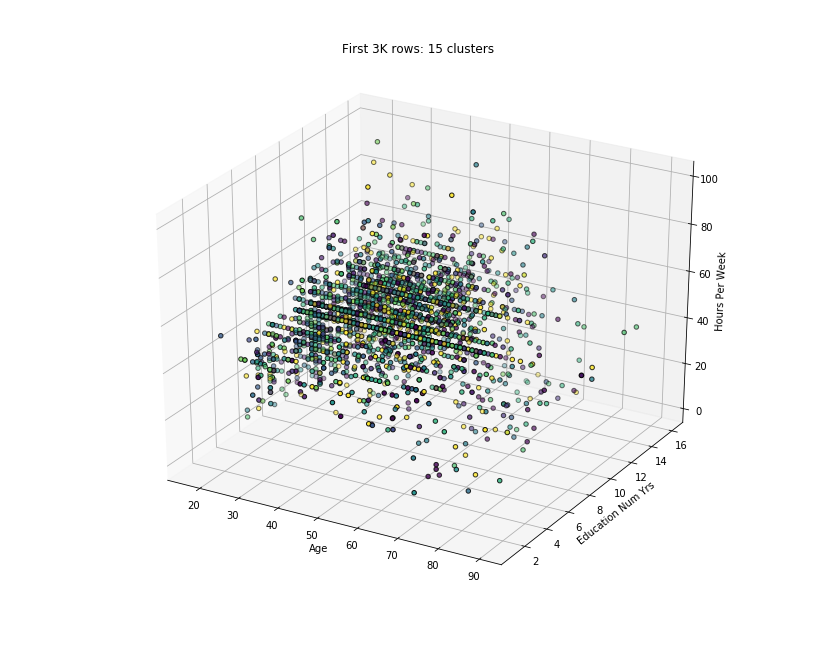

In [50]:
DmedData = pd.get_dummies(medData)
DmedData = DmedData.drop('income_ <=50K', axis=1)
X1 = DmedData.iloc[ :, :-1]
y1 = DmedData.iloc[ :, -1:]

estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_15', KMeans(n_clusters=15))]

fignum = 1
titles = ['First 3K rows: 8 clusters', 'First 3K rows: 3 clusters', 'First 3K rows: 15 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1]) #, elev=60, azim=134)
    est.fit(X1)
    labels = est.labels_

    ax.scatter(X1.iloc[:3000,0], X1.iloc[:3000,2], X1.iloc[:3000,5],
               c=labels[:3000].astype(np.float), edgecolor='k')

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Education Num Yrs')
    ax.set_zlabel('Hours Per Week')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

In [51]:
print('Program completed at:', datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S"))

Program completed at: Wed, 27 November 2019 20:26:05
